## __hypothetical testing__

In [83]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
import scipy.stats.distributions as dist
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df['target'].unique()

array([0, 1])

### __proportion one sample z-test__

__<br>
“The population proportion of Ireland and UK citizens having heart disease is 50%. Are more people suffering from heart disease in the Cleveland, Hungary, Switzerland, and Long Beach combined”? <br> alpha 0.05__

h0 : population proportion suffering from heart disease in the 4 areas combined <= 50% <br>
h1 : population proportion suffering from heart disease in the 4 areas combined > 50%

In [40]:
p_pop = len(df[df['target']==1])/len(df)
p_pop

0.5131707317073171

The population proportion of the sample having heart disease is 0.51 or 51%. This percentage is more than the null hypothesis. That is 51%.

This case we will use Z-test, as the difference is in proportion and population is larger than 30

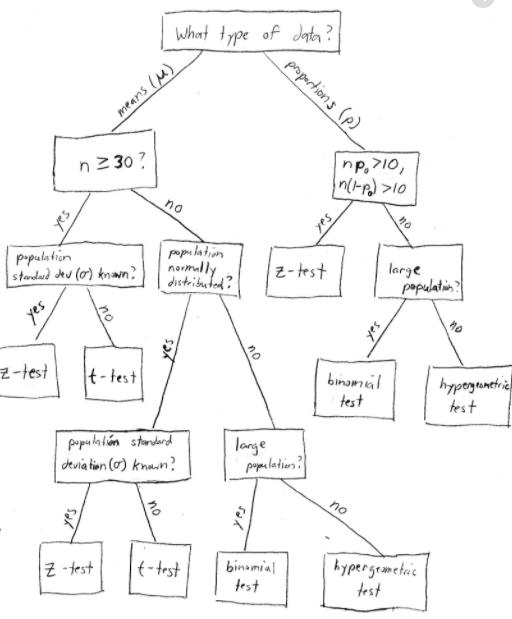

The formula is :

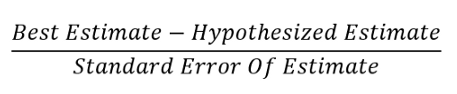 ----> 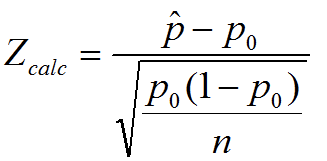

In [44]:
#calculating standard error

se = np.sqrt(0.5 * (1-0.5) / len(df))
se

0.015617376188860606

In [42]:
#hypothesized estimate

be = p_pop # proporsi yang dinilai  
he = 0.5  # proporsi pembanding
test_stat = (be - he)/se
test_stat

0.8433383141984735

In [45]:
#calculate pvalue

pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

0.3990392604581149

P-value is 95% or 0.05

Here p-value is bigger than our considered significance level of 0.05. So, we cannot reject the null hypothesis. That means there is no significant difference in population proportion having heart disease in both population.

In [50]:
alpha = 0.05
Tcrit = stats.t.ppf(1-alpha, (len(df)-1))
print('Critical Value:', Tcrit)
print(1-alpha)

Critical Value: 1.6463430380866444
0.95


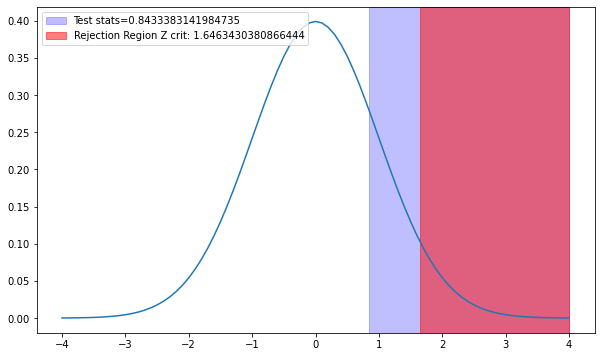

In [100]:
x_axis = [i/10 for i in range(-40,41)]
y_axis = [stats.t.pdf(i,(len(df)-1)) for i in x_axis]

plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(test_stat,4,alpha=0.25,color='blue', label=f'Test stats={test_stat}')
plt.axvspan(Tcrit,4,alpha=0.5,label=f'Rejection Region Z crit: {Tcrit}', color='red')

plt.legend(loc='upper left')
plt.show()

Here t-stats is lower than our rejection region treshold. So, we cannot reject the null hypothesis. That means there is no significant difference in population proportion having heart disease in both population.

### __mean one sample t-test__

__<br>We need to find out if the mean of 'maximum heart rate achieved' is greater than 145. 
Let’s assume that the mean RestBP is less than or equal to 145__

h0 : mean is <= to 145<br>
h1 : mean is > 145<br>
We will check if we can reject the null hypothesis using a significance level of 0.05.

In [67]:
df['thalach'].mean()

149.11414634146342

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


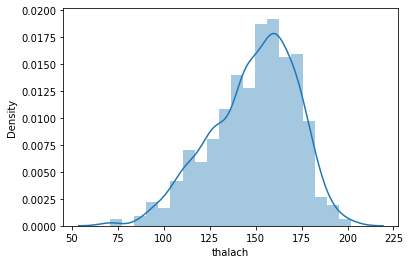

In [66]:
sns.distplot(df['thalach'], kde=True)

The formula is :<br>
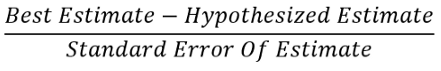 ------> 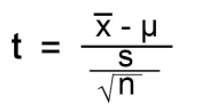

In [68]:
thalach = df['thalach']

In [70]:
std = thalach.std()
n = len(df)
se = std/np.sqrt(n)
se

0.7185780844758586

In [77]:
#Best estimate
be = thalach.mean() #Hypothesized estimate
he = 145
test_statistic = (be - he)/se
test_statistic

5.725399132460801

In [78]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))
pvalue

1.031908425894605e-08

The p-value is 0.00000001 which is less than the significance level (0.05).<br>
So, we can reject the null hypothesis.

In [84]:
alpha = 0.05
value = norm.ppf(alpha)
print('Critical Value:', Tcrit)
print(1-alpha)

Critical Value: 1.6463430380866444
0.95


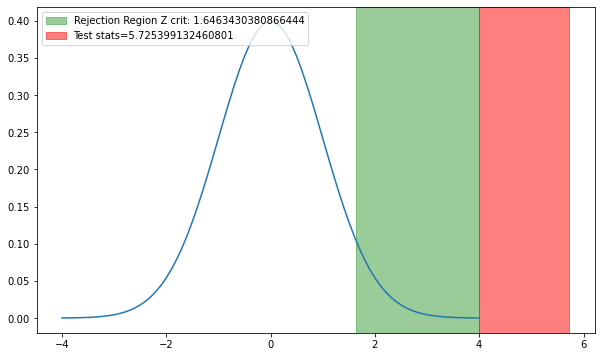

In [103]:
x_axis = [i/10 for i in range(-40,41)]
y_axis = [stats.t.pdf(i,(len(df)-1)) for i in x_axis]

plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(Tcrit,4,alpha=0.4,label=f'Rejection Region Z crit: {Tcrit}', color='green')
plt.axvspan(test_statistic,4,alpha=0.5,color='red', label=f'Test stats={test_statistic}')
plt.legend(loc='upper left')
plt.show()

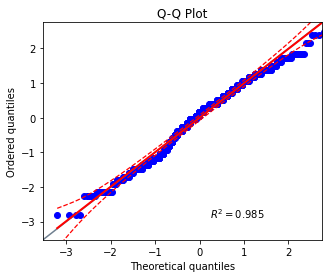

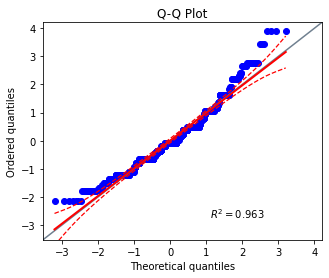

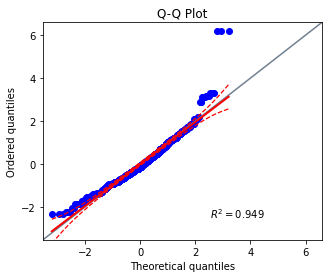

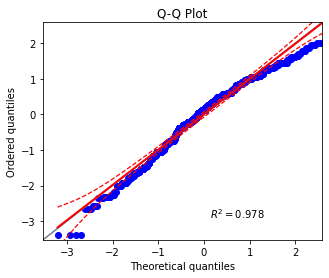

In [24]:
#checking normal distribution
pg.qqplot(df['age'], dist='norm')
pg.qqplot(df['trestbps'], dist='norm')
pg.qqplot(df['chol'], dist='norm')
pg.qqplot(df['thalach'], dist='norm')